In [290]:
# import functions from modsim
from modsim import *

In [291]:
def unesa_to_swk():
    # print('Anak UNESA otiwi SWK')
    if sim.unesa == 0:
        sim.unesa_empty += 1
        return
    if sim.swk == swk_max:
        if flip(0.65):
            sim.everyone_bungkus += 1;
            return
        else:
            return
    sim.unesa -= 1
    sim.swk += 1
    
def swk_to_unesa():
    # print('Anak UNESA balik')
    if sim.unesa == pop_unesa:
        return
    if sim.swk == 0:
        return
    sim.swk -= 1
    sim.unesa += 1
    


def itts_to_swk():
    # print('Anak ITTS otiwi SWK')
    if sim.itts == 0:
        sim.itts_empty += 1
        return
    if sim.swk == swk_max:
        if flip(0.65):
            sim.everyone_bungkus += 1;
            return
        else:
            return
    sim.itts -= 1
    sim.swk += 1
    
def swk_to_itts():
    # print('Anak ITTS balik')
    if sim.itts == pop_itts:
        return
    if sim.swk == 0:
        return
    sim.swk -= 1
    sim.itts += 1


    
def other_to_swk():
    # print('Orang Lain otiwi SWK')
    if sim.other == 0:
        sim.other_empty += 1
        return
    if sim.swk == swk_max:
        if flip(0.65):
            sim.everyone_bungkus += 1;
            return
        else:
            return
    sim.other -= 1
    sim.swk += 1
    
def swk_to_other():
    # print('Orang Lain balik')
    if sim.other == pop_other:
        return
    if sim.swk == 0:
        return
    sim.swk -= 1
    sim.other += 1
    
def perbungkusan():
    if flip(0.5):
        if sim.everyone_bungkus == 0:
            return
        sim.everyone_bungkus -= 1;
    if flip(0.5):
        sim.everyone_bungkus += 1;
        

In [292]:
def step(probUnesa, probItts, probOther, probBungkus):
    if flip(probUnesa):
        if flip(0.65):
            unesa_to_swk()
        else:
            swk_to_unesa()
    if flip(probItts):
        if flip(0.6):
            itts_to_swk()
        else:
            swk_to_itts()
    if flip(probOther):
        if flip(0.55):
            other_to_swk()
        else:
            swk_to_other()
    if flip(probBungkus):
        perbungkusan()


In [293]:
pop_unesa = 70
pop_itts = 60
pop_other = 40
swk_max = 50
sim = State(unesa=pop_unesa, itts=pop_itts, other=pop_other, swk=0, unesa_empty=0, itts_empty=0, other_empty=0, everyone_bungkus=0)

In [294]:
hasil1 = TimeSeries()
hasil2 = TimeSeries()
hasil3 = TimeSeries()
hasil4 = TimeSeries()
hasil5 = TimeSeries()

- per 10 menit katakan ada yang datang 2 orang
- per 30 menit katakan ada yang balik 2 orang
- per 30 menit ada 4 orang bungkus
- per 15 menit 1 orang bungkus balik
- berarti probabilitas per menitnya berapa orang?
    - 1 orang bakal datang 5menit (0.2)
    - 1 orang bakal balik per 15menit (0.07)
    - 1 orang bakal bungkus per 7.5menit (0.13)
    - 1 orang yg bungkus bakal ballik per 15 menit (0.07)

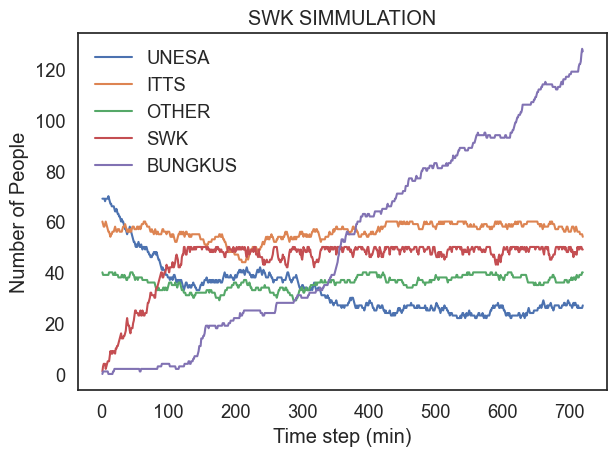

In [295]:
for i in range(720):
    # print(i)
    step(0.7, 0.6, 0.35, 0.25)
    hasil1[i+1] = sim.unesa
    hasil2[i+1] = sim.itts
    hasil3[i+1] = sim.other
    hasil4[i+1] = sim.swk
    hasil5[i+1] = sim.everyone_bungkus
    
plt.plot(hasil1, label='UNESA')
plt.plot(hasil2, label='ITTS')
plt.plot(hasil3, label='OTHER')
plt.plot(hasil4, label='SWK')
plt.plot(hasil5, label='BUNGKUS')


decorate(title='SWK SIMMULATION',
         xlabel='Time step (min)', 
         ylabel='Number of People')


In [297]:
break

,values
unesa,27
itts,54
other,40
swk,49
unesa_empty,0
itts_empty,0
other_empty,0
everyone_bungkus,127


In [306]:
def step2(sim, probUnesa, probItts, probOther, probBungkus, swk_max):
    if flip(probUnesa):
        if flip(0.7):
            unesa_to_swk(sim, swk_max)
        else:
            swk_to_unesa(sim, swk_max)
    if flip(probItts):
        if flip(0.6):
            itts_to_swk(sim, swk_max)
        else:
            swk_to_itts(sim, swk_max)
    if flip(probOther):
        if flip(0.5):
            other_to_swk(sim, swk_max)
        else:
            swk_to_other(sim, swk_max)
    if flip(probBungkus):
        perbungkusan(sim, swk_max)

In [307]:
def unesa_to_swk(sim, swk_max):
    print('Anak UNESA otiwi SWK')
    if sim.unesa == 0:
        sim.unesa_empty += 1
        return
    if sim.swk == swk_max:
        return
    sim.unesa -= 1
    sim.swk += 1
    
def swk_to_unesa(sim, swk_max):
    print('Anak UNESA balik')
    if sim.unesa == pop_unesa:
        return
    if sim.swk == 0:
        sim.swk_empty += 1
        return
    sim.swk -= 1
    sim.unesa += 1
    


def itts_to_swk(sim, swk_max):
    print('Anak ITTS otiwi SWK')
    if sim.itts == 0:
        sim.itts_empty += 1
        return
    if sim.swk == swk_max:
        return
    sim.itts -= 1
    sim.swk += 1
    
def swk_to_itts(sim, swk_max):
    print('Anak ITTS balik')
    if sim.itts == pop_itts:
        return
    if sim.swk == 0:
        sim.swk_empty += 1
        return
    sim.swk -= 1
    sim.itts += 1


    
def other_to_swk(sim, swk_max):
    print('Orang Lain otiwi SWK')
    if sim.other == 0:
        sim.other_empty += 1
        return
    if sim.swk == swk_max:
        return
    sim.other -= 1
    sim.swk += 1
    
def swk_to_other(sim, swk_max):
    print('Orang Lain balik')
    if sim.other == pop_other:
        return
    if sim.swk == 0:
        sim.swk_empty += 1
        return
    sim.swk -= 1
    sim.other += 1
    
def perbungkusan(sim, swk_max):
    if flip(0.5):
        if sim.everyone_bungkus == 0:
            return
        sim.everyone_bungkus -= 1;
    if flip(0.5):
        sim.everyone_bungkus += 1;
        

In [312]:
def run_simulation(pop_unesa, pop_itts, pop_other, probUnesa, probItts, probOther, probBungkus, num_steps, swk_max):
    sim = State(
        unesa=pop_unesa, itts=pop_itts, other=pop_other, swk=0, 
        unesa_empty=0, itts_empty=0, other_empty=0, swk_empty=0,
        everyone_bungkus=0
    )
    
    res1 = TimeSeries()
    res2 = TimeSeries()
    res3 = TimeSeries()
    res4 = TimeSeries()
    res5 = TimeSeries()
    
    for i in range(num_steps):
        step2(sim, probUnesa, probItts, probOther, probBungkus, swk_max)
        res1[i+1] = sim.unesa
        res2[i+1] = sim.itts
        res3[i+1] = sim.other
        res4[i+1] = sim.swk
        res5[i+1] = sim.everyone_bungkus
        

    return sim, res1, res2, res3, res4, res5


def drawGraphic(res1, res2, res3, res4, res5, title):
    plt.plot(res1, label='UNESA')
    plt.plot(res2, label='ITTS')
    plt.plot(res3, label='OTHER')
    plt.plot(res4, label='SWK')
    plt.plot(res5, label='BUNGKUS')

    decorate(title=title,
            xlabel='Time step (min)', 
            ylabel='Number of People')


In [ ]:
# pop_unesa = 100
# pop_itts = 60
# pop_other = 40
# swk_max = 50

Anak UNESA balik
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Orang Lain balik
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain otiwi SWK
Anak ITTS otiwi SWK
Orang Lain balik
Anak UNESA otiwi SWK
Anak UNESA balik
Orang Lain otiwi SWK
Orang Lain balik
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Orang Lain otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Orang Lain otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Orang Lain balik
Anak ITTS balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA balik
Anak ITTS otiwi SWK
Orang Lain balik
Anak UNESA otiwi SWK
Anak ITTS balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain balik
Anak UNESA otiwi SWK
Orang Lain otiwi SWK
Anak UNESA balik
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA balik
Anak UNESA otiwi SWK
Orang Lain balik
Anak UNESA balik
Anak ITTS otiwi SWK
Anak UNESA balik
Anak ITTS balik
Anak UN

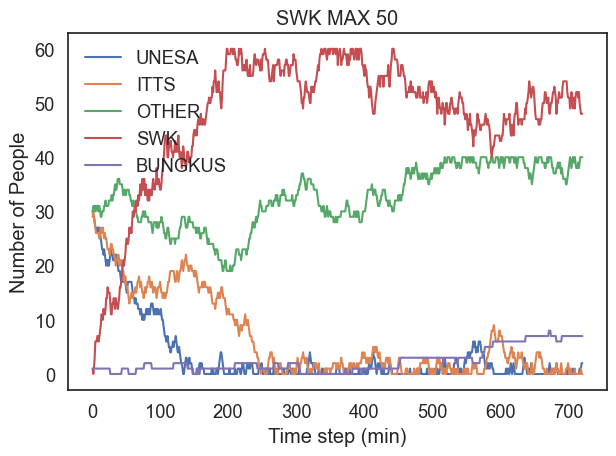

In [313]:
final_state, r1, r2, r3, r4, r5 = run_simulation(30, 30, 30, 0.7, 0.65, 0.55, 0.1, 720, 60)
drawGraphic(r1, r2, r3, r4, r5, "SWK MAX 50")

In [ ]:
final_state

,values
unesa,1
itts,0
other,38
swk,51
unesa_empty,169
itts_empty,59
other_empty,0
swk_empty,4


Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Anak ITTS balik
Anak UNESA otiwi SWK
Anak ITTS balik
Orang Lain otiwi SWK
Anak ITTS otiwi SWK
Orang Lain balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Orang Lain balik
Anak ITTS otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS balik
Anak ITTS otiwi SWK
Anak UNESA balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain balik
Anak ITTS balik
Orang Lain otiwi SWK
Anak ITTS otiwi SWK
Orang Lain otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain otiwi SWK
Anak UNESA balik
Orang Lain balik
Anak ITTS otiwi SWK
Anak ITTS otiwi SWK
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Anak ITTS balik
Anak ITTS balik
Anak UNESA otiwi SWK
Orang Lain balik
Orang Lain balik
Orang Lain balik
Anak UNESA otiwi SWK
Anak ITTS otiwi SWK
Orang Lain balik
Anak UNESA balik
Orang Lain 

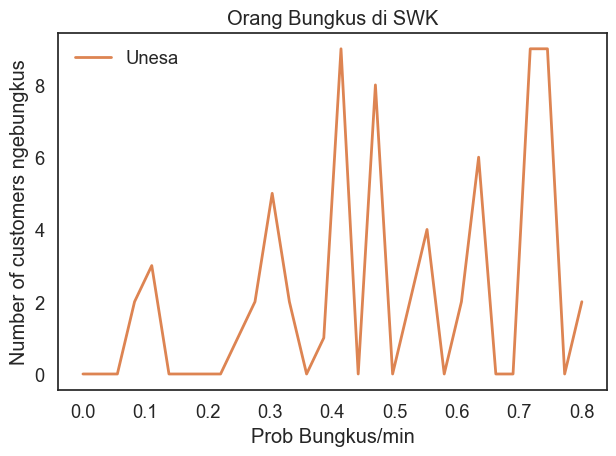

In [314]:
sweep = SweepSeries()

prob_bungkus_array = linspace(0, 0.8, 30)
num_steps = 100
probItts = 0.45
probOther = 0.25
probUnesa = 0.5

for prob_bungkus in prob_bungkus_array:
    final_state = run_simulation(30, 30, 30, probUnesa, probItts, probOther,prob_bungkus, num_steps, 50)
    sweep[prob_bungkus] = final_state[0].everyone_bungkus

sweep.plot(label='Orang Bungkus', color='C1')

decorate(title='Orang Bungkus di SWK',
         xlabel='Prob Bungkus/min', 
         ylabel='Number of customers ngebungkus')